In [76]:
"""
1.Gather and import the data
2.data cleaning -> inconsistensies, missing values
3.EDA
4.Outlier detection and removal(univariate, multi variate)
5.data balance / resampling
6.feature selection/ dimesionaltiy reduction
7.feature scaling
8.cross validation 
9.hyper parameter tuning
10.model building
11.prediction and evalution
12.deploy



""";

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("grapes_new.csv")

In [79]:
df

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,...,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE,CLASS
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,...,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean,High
1,112.57,elliptical,20.30,13.20,1.78,2.14,11.2,100,2.65,2.76,...,1.05,1050,23.40,51.91,31.28,99.05,7.66,48.18,archean,High
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,...,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean,High
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,...,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial,High
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,...,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,102.34,elliptical,21.23,12.07,2.16,2.17,21.0,85,2.60,2.65,...,0.86,378,25.58,46.15,30.14,89.52,8.49,55.83,alluvial,Medium
190,109.80,elliptical,21.67,12.43,1.53,2.29,NaN,86,2.74,3.15,...,0.69,352,24.23,52.23,30.72,85.91,7.73,55.47,archean,Medium
191,103.86,round,22.01,11.79,2.13,2.78,28.5,92,2.13,2.24,...,0.97,466,27.62,48.98,30.46,86.31,7.57,47.57,archean,Medium
192,98.30,elliptical,21.95,12.37,1.63,2.30,24.5,88,2.22,2.45,...,0.89,342,27.54,47.72,30.01,90.60,7.15,45.91,alluvial,Medium


In [80]:
df.shape

(194, 21)

In [81]:
df.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         2
ALCOHOL_PER          3
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    6
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  2
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         4
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
CLASS                0
dtype: int64

In [82]:
df.describe

<bound method NDFrame.describe of      COLOR_INTENSITY       SHAPE  RIPENESS_PER  ALCOHOL_PER  MALIC_ACID_PER  \
0             120.53  elliptical         16.73        14.23            1.71   
1             112.57  elliptical         20.30        13.20            1.78   
2             120.78  elliptical         20.81        13.16            2.36   
3             134.17  elliptical         19.47        14.37            1.95   
4             112.19       round         17.57        13.24            2.59   
..               ...         ...           ...          ...             ...   
189           102.34  elliptical         21.23        12.07            2.16   
190           109.80  elliptical         21.67        12.43            1.53   
191           103.86       round         22.01        11.79            2.13   
192            98.30  elliptical         21.95        12.37            1.63   
193           101.33  elliptical         21.60        12.04            4.30   

      ASH  ALCALI

In [83]:
df.duplicated().sum()

0

In [84]:
df['ALCALINITY_OF_ASH'] = df['ALCALINITY_OF_ASH'].fillna(df['ALCALINITY_OF_ASH'].median())


In [85]:
df.columns = df.columns.str.strip()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COLOR_INTENSITY    194 non-null    float64
 1   SHAPE              194 non-null    object 
 2   RIPENESS_PER       192 non-null    float64
 3   ALCOHOL_PER        191 non-null    float64
 4   MALIC_ACID_PER     194 non-null    float64
 5   ASH                194 non-null    float64
 6   ALCALINITY_OF_ASH  194 non-null    float64
 7   MAGNESIUM_MEASURE  194 non-null    int64  
 8   TOTAL_PHENOLS      194 non-null    float64
 9   FLAVANOIDS         194 non-null    float64
 10  PROANTHOCYANINS    194 non-null    float64
 11  HUE                192 non-null    float64
 12  PROLINE            194 non-null    int64  
 13  TEMPERATURE        194 non-null    float64
 14  AVG_HUMIDITY       194 non-null    float64
 15  FERT_NITRO_PER     194 non-null    float64
 16  WATER_O2_PER       190 non

In [87]:
df.dropna(inplace=True)      

In [88]:
df.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         0
ALCOHOL_PER          0
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    0
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  0
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         0
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
CLASS                0
dtype: int64

In [89]:
#EDA

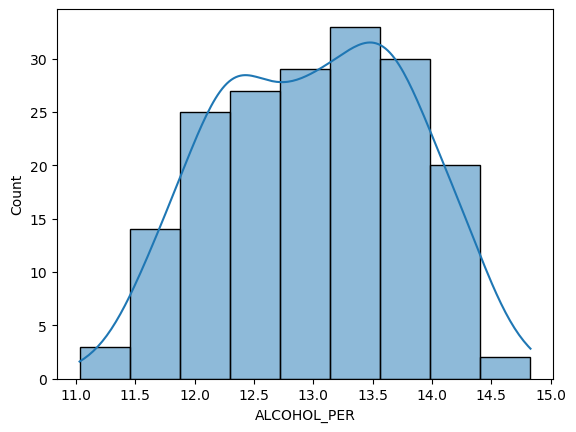

In [90]:
sns.histplot(df['ALCOHOL_PER'], kde = True);

In [93]:
one = df.iloc[:, :4]
one['CLASS'] = df['CLASS']
two = df.iloc[:, :4:8]
three = df.iloc[:, :8:12]
four = df.iloc[:, :12:16]
five = df.iloc[:, :16:20]


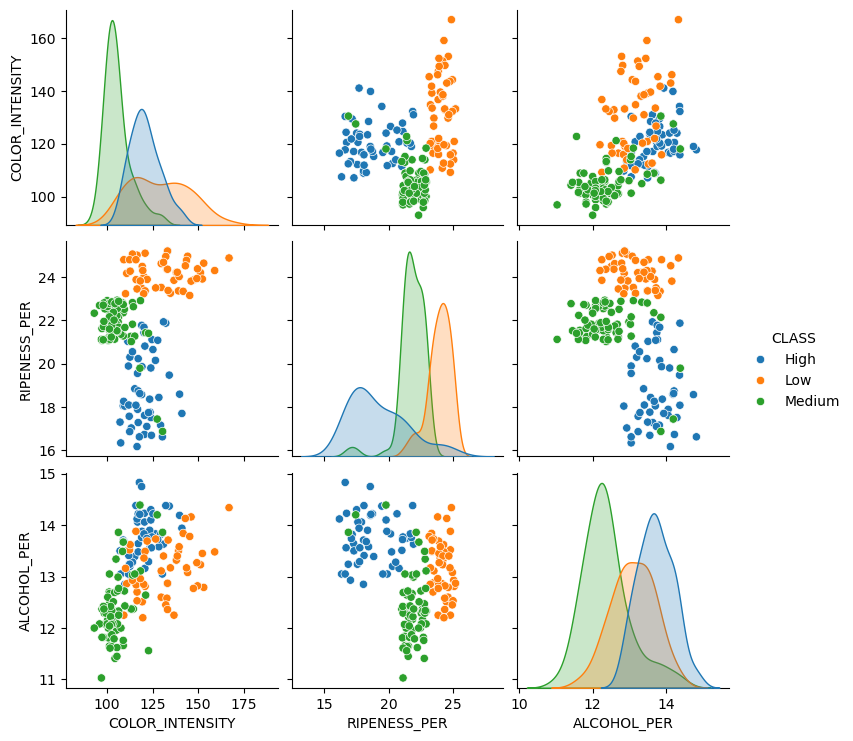

In [94]:
sns.pairplot(one , hue = 'CLASS')

In [96]:
#separate the data

In [97]:
x = df.drop('CLASS', axis = 1)
y = df['CLASS']

<Axes: xlabel='CLASS', ylabel='count'>

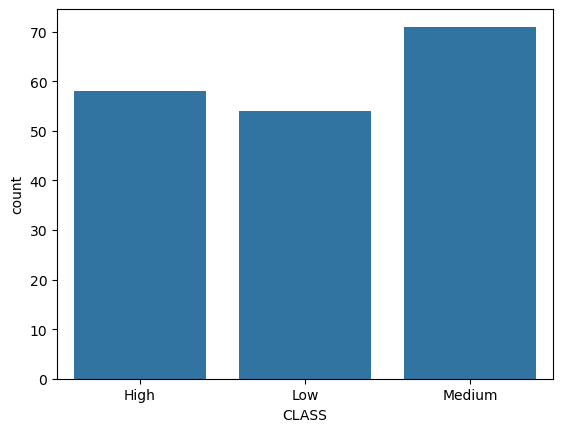

In [99]:
sns.countplot(x=y)

<Axes: >

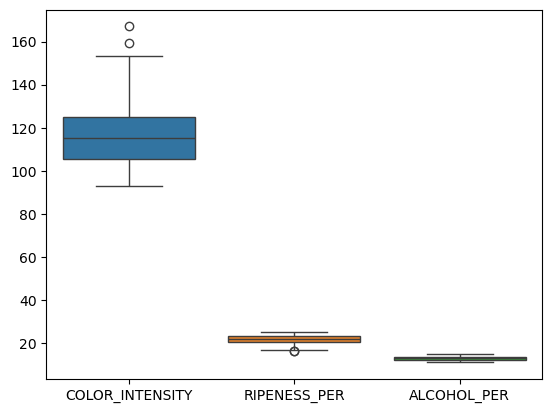

In [100]:
sns.boxplot(one)

<Axes: >

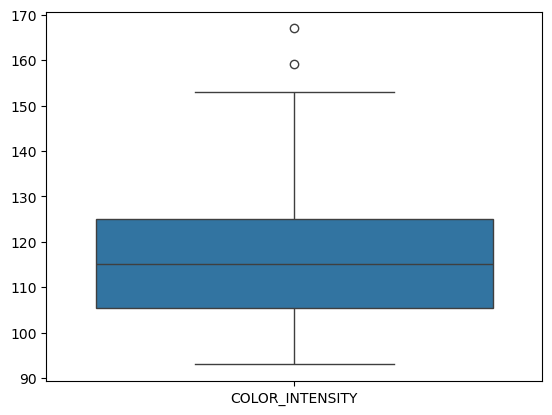

In [101]:
sns.boxplot(two)

<Axes: >

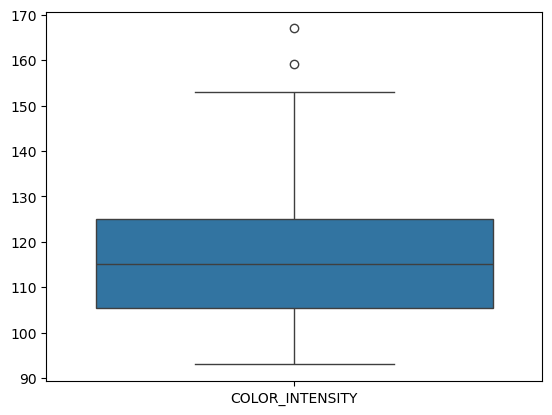

In [103]:
sns.boxplot(three)

In [104]:
#create a function which iterate over all the columns of the dataframe and will remove the outliers -> will give u cleaned data


In [107]:
def remove_outliers(df):
    cleaned_df = df.copy()
    
    for col in cleaned_df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    
    return cleaned_df


In [109]:
cleaned_df

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,...,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE,CLASS
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,...,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean,High
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,...,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean,High
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,...,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial,High
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,...,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean,High
5,127.54,elliptical,17.44,14.20,1.76,2.45,15.2,112,3.27,3.39,...,1.05,1450,22.23,48.39,31.27,94.00,7.35,39.86,alluvial,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,102.60,elliptical,21.78,11.87,4.31,2.39,21.0,82,2.86,3.03,...,0.75,380,28.32,56.74,28.21,89.72,6.74,38.88,alluvial,Medium
189,102.34,elliptical,21.23,12.07,2.16,2.17,21.0,85,2.60,2.65,...,0.86,378,25.58,46.15,30.14,89.52,8.49,55.83,alluvial,Medium
190,109.80,elliptical,21.67,12.43,1.53,2.29,19.5,86,2.74,3.15,...,0.69,352,24.23,52.23,30.72,85.91,7.73,55.47,archean,Medium
192,98.30,elliptical,21.95,12.37,1.63,2.30,24.5,88,2.22,2.45,...,0.89,342,27.54,47.72,30.01,90.60,7.15,45.91,alluvial,Medium


In [114]:
df = remove_outliers(df)

In [115]:
df.shape

(159, 21)

In [116]:
x = df.drop('CLASS', axis = 1)
y = df['CLASS']

In [117]:
x

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,PROANTHOCYANINS,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,2.29,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,2.81,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,2.18,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,1.82,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean
5,127.54,elliptical,17.44,14.20,1.76,2.45,15.2,112,3.27,3.39,1.97,1.05,1450,22.23,48.39,31.27,94.00,7.35,39.86,alluvial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,102.60,elliptical,21.78,11.87,4.31,2.39,21.0,82,2.86,3.03,2.91,0.75,380,28.32,56.74,28.21,89.72,6.74,38.88,alluvial
189,102.34,elliptical,21.23,12.07,2.16,2.17,21.0,85,2.60,2.65,1.35,0.86,378,25.58,46.15,30.14,89.52,8.49,55.83,alluvial
190,109.80,elliptical,21.67,12.43,1.53,2.29,19.5,86,2.74,3.15,1.77,0.69,352,24.23,52.23,30.72,85.91,7.73,55.47,archean
192,98.30,elliptical,21.95,12.37,1.63,2.30,24.5,88,2.22,2.45,1.90,0.89,342,27.54,47.72,30.01,90.60,7.15,45.91,alluvial


In [118]:
#Feature selection

In [119]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [124]:
fs = SequentialFeatureSelector(DecisionTreeClassifier(), n_features_to_select=5)

In [125]:
x = pd.get_dummies(x)

In [126]:
fs.fit(x, y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          n_features_to_select=5)

In [127]:
fs.get_support();

In [128]:
x = x.iloc[:, fs.get_support()]

In [129]:
x

,RIPENESS_PER,ALCALINITY_OF_ASH,FERT_NITRO_PER,WATER_O2_PER,SHAPE_elliptical
0,16.73,15.6,31.21,97.67,True
2,20.81,18.6,31.92,97.95,True
3,19.47,16.8,31.79,95.46,True
4,17.57,21.0,31.86,94.45,False
5,17.44,15.2,31.27,94.00,True
...,...,...,...,...,...
188,21.78,21.0,28.21,89.72,True
189,21.23,21.0,30.14,89.52,True
190,21.67,19.5,30.72,85.91,True
192,21.95,24.5,30.01,90.60,True


# feature scaling

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [131]:
# cross validiation

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, 
                                                    random_state=0,
                                                   test_size=0.25)

In [136]:
# model building

In [138]:
dt = DecisionTreeClassifier(random_state=0, criterion = 'entropy')

In [139]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [141]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [142]:
y_pred = knn.predict(x_test)

In [143]:
accuracy_score(y_test, y_pred)


0.975

In [144]:
#serialization

In [145]:
import joblib

In [146]:
joblib.dump(dt, 'model.pkl')

['model.pkl']

In [ ]:
joblib.dump(s, 'scaler.pkl')